In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
np.random.seed(3523 - 4 -28)

# ___Making Population Inferences Based on Only One Sample___
----------------

In [1]:
# In practice, we cannot afford to make repetitive sampling attempts
# This is not fiscally sensible and most of the time researches so not have the resources to do so.
# In real life, we end up with just one sample, which we'll use to make inferences.

In [2]:
# There are two approaches to this.

    # Confidence interval estimate for the parameter of interest
    # Hypothesis testing about the parameter of interest

In [3]:
# The term parameter of interest refers to mean, proportion, regression coefficient, odds ratio etc..

In [4]:
# ONE KEY ASSUMPTION WHEN MAKING INFERENCES IS THAT WE ASSUME NORMALITY IN THE SAMPLING DISTRIBUTION OF THE PARAMETER OF INTEREST.

## ___What If The Sampling Distribution is not Approximately Normal?___
-------------

In [5]:
# Will we be able to make sensible inferences in that case?
# We'll discuss alternatives later in this specialization.

## ___Computing the Point Estimates___
-----------------

### ___1) We start by computing unbiased point estimates of the parameter of interest.___

In [7]:
# Unbiased point estimates -> estimates whose mean is equal to mean of the true parameter of interest.
# on other words, unbiased point estimates are estimates computed from repeated random sampling with the same sampling frame.

In [36]:
population = np.random.normal(loc = 100, scale = 180, size = 1000_000)
unbiased_sample_means = np.array([])
biased_sample_means = np.array([])

for i in range(1000):
    unbiased_sample_means = np.append(unbiased_sample_means, np.random.choice(population, 1000, replace = True).mean())
    biased_sample_means = np.append(biased_sample_means, population[i:(i + 1000)].mean())

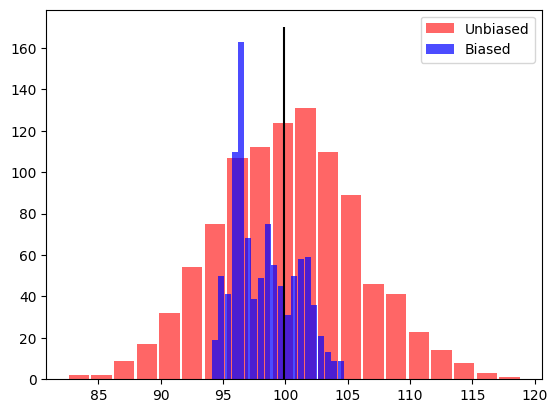

In [40]:
plt.hist(unbiased_sample_means, rwidth = 0.9, color = "red", bins = 20, alpha = 0.6, label = "Unbiased")
plt.hist(biased_sample_means, rwidth = 0.9, color = "blue", bins = 20, alpha = 0.7, label = "Biased")
plt.vlines(x = population.mean(), ymin = 0, ymax = 170, color = "black")
plt.legend()
plt.show()

In [38]:
# Black line is the true population mean.
# The biased sample distribution has shifted its mean to the left, because we sampled within the first 2000 values of a 1,000,000 value
# normal distribution!
# However, the random sampling has an average mean that is reflective of the population mean.

In [41]:
# When the sample is biased, the estimated parameter is likely to differ significantly from the true population parameter.

# WE WANT THE ESTIMATE THAT WE ARE COMPUTING TO BE UNBIASED WITH RESPECT TO THE SAMPLE DESIGN.
# WE WANT THE ESTIMATE OF THE POPULATION PARAMETER TO BE UNBIASED, WITH REGARDS TO THE SAMPLE DESIGN EMPLOYED TO GARNER THE DATA.

In [42]:
# IF SAMPLE DESIGN INVOLVED GROUPS WITH UNEQUAL PROBABILITIES OF SAMPLING, THIS REQUIRES THE USE OF WEIGHTS WHEN COMPUTING POINT ESTIMATES.
# IF WE FAIL TO USE THE WEIGHTS WHEN THE SAMPLING INVOLVED UNEQUAL PROBABILITIES OF SELECTION, OUR SAMPLING DISTRIBUTION MIGHT BECOME
# SHIFTED.

### ___2) Estimate the Sampling Variance Associated with the Point Estimates___

In [43]:
# Technicall we need to draw many samples to compute this variance.
# In practice, we do not have that lavish resources.
# Thus, we need to estimate the variance based on one sample.

In [44]:
# Much like we needing to find an unbiased point estimate, we also need to find an unbiased sampling variance.
# AN UNBIASED SAMPLING VARIANCE CORRECTLY DESCRIBES THE VARIANCE IN THE SAMPLING DISTRIBUTION UNDER THE EMPLOYED SAMPLING DESIGN.
# NOTE THAT THIS SAMPLING VARIANCE IS DEPENDENT ON THE SAMPLING DESIGN.

In [48]:
population = np.random.randint(0, 1000, 10_000)
sample_means = []

for i in range(1000):
    sample_means.append(np.random.choice(population, size = 1000).mean())

In [49]:
population.mean()

499.1997

In [50]:
np.mean(sample_means)

499.052853

In [52]:
# variance in the point estimates
# std = sqrt(variance)

np.std(sample_means)

8.94746623918699

# ___Standard Error of the Point Estimate = $\sqrt{variance}$___

In [53]:
# Standard error is just the standard deviation of the sampling distribution.

## ___Forming a Confidence Interval___

In [54]:
# confidence interval = best estimate +- margin of error
# This margin of error accomodates the sampling error (variance in our hypothetical sampling distribution)

In [55]:
# best estimate = unbiased point estimate
# margin of error = a few estimated standard errors
# "a few" because we allow one standard error on either side.

In [3]:
# "a few" ->
            # a multiplier from the appropriate distribution based on the desired confidence level and sample design.

### ___95% confidence level &rarr; 0.05 significance___

In [ ]:
# What this means is that, 95% of 